# Class 6 - Different plots for different data

&nbsp;
<div>
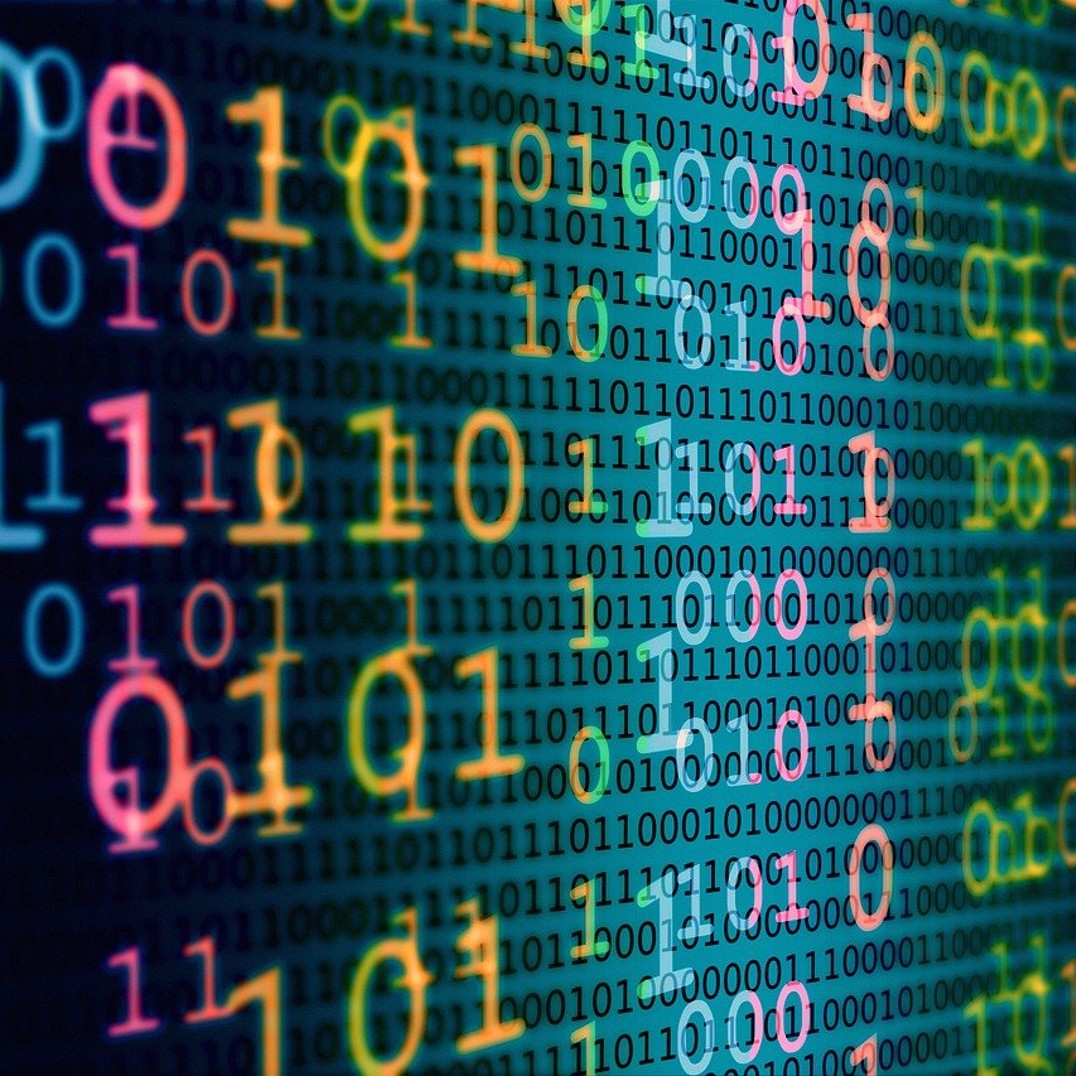
</div>
&nbsp;

Today's notebook addresses 2 ideas:

1. We can generate statistically random data from known distributions.
2. Different kinds of plots work best for different kinds of data.  

Which plotting approach works for given data depends on how many data points there are, and on the statistical properties of the data. We will illustrate this today by generating data from known statistical distributions, and plotting these data in different ways. Some of these plots will be informative and others less so.

The section on statistically random data gets into some detail about what randomness means, and how Python generates random numbers. Afterwards, the section on plotting is more visual.

## Load modules

The random number generators that we need are in the numpy (numerical Python) module, so we need to load that along with pandas and seaborn.

To customize plots, we also need to import matplotlib.pyplot

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Wait, what does it mean to generate random numbers?

&nbsp;
<div>
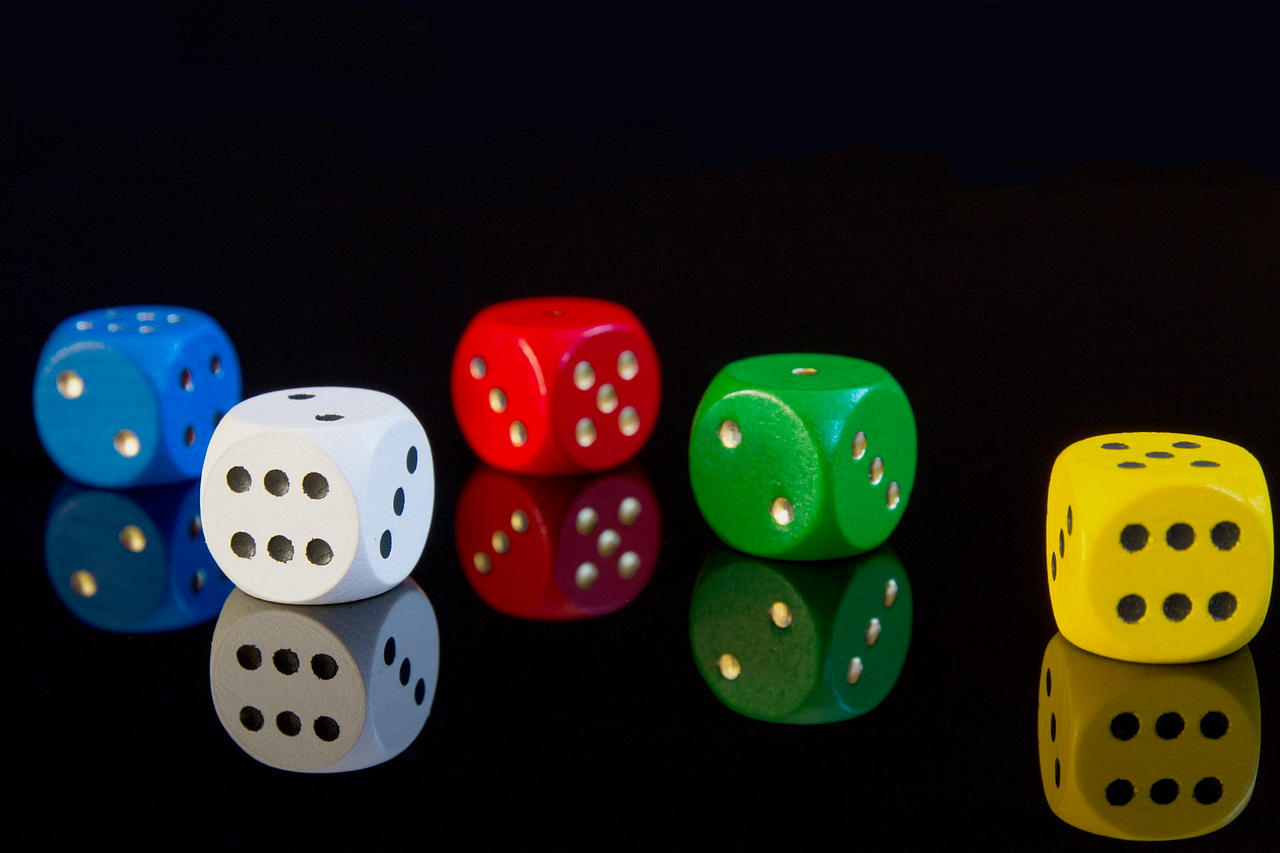
</div>
&nbsp;

The word "random" has many different meanings.

In today's context, we mean statistical randomness. "A numeric sequence is said to be **statistically random** when it contains no recognizable patterns or regularities." https://en.wikipedia.org/wiki/Statistical_randomness

In other contexts, "random" means "non-deterministic", that if you do the same thing again you would get an unpredictably different outcome.

Programming languages include methods to generate **pseudorandom** numbers. These are numbers that are statistically random, but in fact deterministic.

Pseudorandom number generators are extremely useful. They can be used to simulate datasets with no meaningful structure, to avoid us fooling ourselves by seeing structure that isn't meaningful.


### Seeding a pseudorandom number generator

Each pseudorandom number generator takes as input a "seed" number. If you run the same generator code with the same seed, you'll get the same result again so in that sense it's deterministic. If you run with a different seed, you'll get a different result. And whatever seed you use, the output will be statistically random, with no recognizable patterns.

By default, the seed is a number based on the computer's date and time, so that the random number generator gives a different output every time you run it.

Let's start to use numpy's random number generator. The documentation is at https://numpy.org/doc/2.1/reference/random/index.html

Run the following code:

In [ ]:
# set up a random number generator
rng_default = np.random.default_rng()
# use it to generate a random number
rng_default.random()

In [ ]:
rng_default.random()

In [ ]:
rng_default.random()

Running this again will give a different outcome:

In [ ]:
# set up a random number generator
rng_default2 = np.random.default_rng()
# use it to generate a random number
rng_default2.random()

**Yes, this is an example of code where you run it twice in a row and get different output!**

Talk to the person next to you. Did your code, running, generate the same or different numbers?

Now we'll give an example where we set the seed for the random number generator.

Run the following code:

In [ ]:
# set up a random number generator
rng_seed42 = np.random.default_rng(seed=42)
# use it to generate a random number
rng_seed42.random()

Run that code again - do you get the same random number again? What about the person next to you?

Then try running with a different random seed. Do you get the same or different number?

In [ ]:
# set up a random number generator with different seed

# use it to generate a random number


The random methods can generate many numbers drawn from the distribution.

*Note: Technically this is a data type called an "numpy array", which is what numpy uses for lists of numbers. If you really want to learn more about numpy arrays, see [numpy for absolute beginners](https://numpy.org/doc/stable/user/absolute_beginners.html), but this will not be on the test. A numpy array is similar to the "Series" data type in pandas data frames. In this course we will focus on data frames and Series.*

In [ ]:
# set up random number generator again with same seed
rng_seed42 = np.random.default_rng(seed=42)
# use it to generate a random number
rng_seed42.random(10)

Here, we set up the random number generator again with the same seed, which resets it.

Note that the **first** value output here is the same as before when you ran `rng_seed42.random()`.

However, running the same line of code **without resetting the seed** will generate different random numbers:

In [ ]:
rng_seed42.random(10)

The numpy `.random()` function generates random numbers that are uniformly distributed between `0` and `1`.

To generate uniformly distributed random numbers with different uniform ranges, multiply the standard output by the width of the range, and add the start of the range.

In [ ]:
rng_seed42.random(10) * 1000

In [ ]:
(rng_seed42.random(10) * 5) + 20

Sometimes when people say "random" informally, they mean "equally likely to be anywhere". A random uniform number kind of does that, in addition to being statistically random. In a moment, we will start plotting random uniform numbers and see what the distributions actually look like.

Later, we'll use generators with different distributions.

Now we've had this detailed discussion about what randomness means, we encourage you to read the help files for the functions that we've been using and also generate a few other random numbers to check your understanding.

In [ ]:
?np.random.default_rng

In [ ]:
?rng_default.random

## Plotting random data of different sizes

Plots are tools to understand and communicate data. 

To see what different plots show about totally random data, we will first generate some data frames of random numbers. Each data frame will have 2, or 10, or 1000 entries.

Run the code chunk below to generate the data.

In [ ]:
# set up a random number generator with known seed
rng_seed2025 = np.random.default_rng(seed=2025)

# create some data frames with 2 random numbers
a2 = rng_seed2025.random(2)
b2 = rng_seed2025.random(2) + 0.1

df_random2 = pd.DataFrame(
    {"a": a2, 
     "b": b2})

# same with 10 random numbers
a10 = rng_seed2025.random(10)
b10 = rng_seed2025.random(10) + 0.1

df_random10 = pd.DataFrame(
    {"a": a10, 
     "b": b10})

# same with 1000 random numbers, but abbreviating the code
df_random1000 = pd.DataFrame(
    {"a": rng_seed2025.random(1000), 
     "b": rng_seed2025.random(1000) + 0.1})

For the purposes of this course, you can treat the code above as having created data frames with "known random" entries.

To understand that code more, try to break it down for yourself. You could use the code chunks that we've left empty below.

*NOTE: The data frame syntax with curly brackets uses a Python data type called a dictionary or dict, which is used to store any kind of python object as a value in "key : value pairs" so you can look up the value using the key. Python dictionaries may be useful elsewhere in your life but are not going to be on the tests for this course. If you really want to know more about dicts, see [Python tutorial on data structures](https://docs.python.org/3/tutorial/datastructures.html)*

Always check your data! Inspect the random data frames to begin to understand them and their statistical properties.

`.describe()` will be particularly useful here, as it calculates the mean and standard deviation.

In [ ]:
df_random2

In [ ]:
df_random2.describe()

In [ ]:
# same for df_random10, then df_random1000

### Plot the data, at long last - histograms first

First, we will plot the `a` values only, using histograms.

As you make each plot, ask "what is this telling me about the data"?

In [ ]:
sns.histplot(x="a", data=df_random2)

In [ ]:
sns.histplot(x="a", data=df_random10)

In [ ]:
sns.histplot(x="a", data=df_random1000)

These plots show that `sns.histplot` estimates the bins automatically from the data. Reminder, a bin in a histogram is a range of values in which we count data, and one bar in a histogram has x-axis edges corresponding to the values in the bin, and a y-value height corresponding to the count of values that fall in that bin. The width of a bin means the distance between the values on the x-axis.

The automated bin estimation in `sns.histplot` can sometimes be useful, sometimes not.

We can specify bins ourselves using the `bins` argument, or combining the `binwidth` and `binrange` argument - see the help file for `sns.histplot`.

Let's plot again setting `binwidth = 0.1` and `binrange = [0, 1]`, which is a sensible number when we know that the data are between 0 and 1.

In [ ]:
sns.histplot(x="a", data=df_random2, binwidth=0.1, binrange=[0, 1])

In this case comparing the histogram with the values of `df_random2` shows how the histogram plot works - a count of 1 for each point in this very small dataset.

In [ ]:
print(df_random2)

In [ ]:
sns.histplot(x="a", data=df_random10, binwidth=0.1, binrange=[0, 1])

Again, you can compare the histogram with the values of `df_random10` and see a count of 1 for each point in this very small dataset. Try that.

In [ ]:
print(df_random10)

This histogram shows that these ten points are not *evenly spaced* between 0 and 1 - they are *randomly distributed*. Small samples from random distributions look uneven.

Now let's plot 1000 random points on a histogram.

In [ ]:
sns.histplot(x="a", data=df_random1000, binwidth=0.1, binrange=[0, 1])

What did you learn?

Histograms can be uninformative for very small datasets.

It's easier to compare histograms of different datasets when they have the same bins.

What else?

### Kernel Density Estimate Plot

Try again using a kernel density estimate plot - this is like a smoothed histogram - on the data with different sizes.

*Tip: read the help files to understand more about this plot type.*

In [ ]:
sns.kdeplot(x="a", data=df_random2)

In [ ]:
# Type your own code here


In [ ]:
# Type your own code here


What did you learn here?


### Cumulative Density Plot

Try again using an empirical cumulative density plot - this shows the proportion of data values less than a given number. Specifically, the y-value of the curve at a given x-value is the proportion of data values less than x.

Empirical cumulative density plots can be very useful

Try this on the data with different sizes.

In [ ]:
sns.ecdfplot(x="a", data=df_random2)

In [ ]:
# Type your own code here


In [ ]:
# Type your own code here


With 1000 points, this distribution looks nice and uniform. With 2 or 10, not so much. But it's hard to compare these plots when they have different axes - in fact the 2-datapoints don't even nearly fill out the whole x-axis range.

Using the "customising plots" tools from homework 5, we can specify the axis range on these ecdf plots so that we can compare them.

We learned `plt.ylim` to set y-axis limits, and similarly `plt.xlim` sets x-axis limits.

Try plotting the ecdf plots from 2, 10, and 1000 points on the same axis limits, so that we can see the representation.

In [ ]:
sns.ecdfplot(x="a", data=df_random2)
plt.xlim(0.0, 1.0)

What did you learn?

These empirical cumulative density plots can be used effectively both on larger and smaller datasets. They give a sense of the "unevenness" of the data.

### Try these on the y-values from the random dataset

In the random datasets above (`df_random2`, `df_random10`, `df_random1000`), we also generated a random `b` column as well as an `a` column.

Try some of the plots that you found most informative above, but on the distribution of `b`. 

Which plots would convince you that the data is randomly uniformly distributed?

Do these plots reinforce your conclusions about more and less useful plots for different sizes of data?

Make sure to check the range of your data! If you copied and pasted code using `plt.xlim(0.0, 1.0)`, what do you lose?

## 2-dimensional plots

The plot types above just examine a single data axis.

We can now use scatterplots to look at correlations of two variables.

Start by a scatterplot with the two-point random data with `a` on the x-axis and `b` on the y-axis.


Try that again for the 10-point dataset, and then for the 1000-point dataset. 

What did you learn from this? Do the variables look correlated? Does it look like there are patterns in the dataset?

Well, these data were randomly generated independently - go back and check the code that produced `df_random2`. Any correlation or perceived pattern is  meaningless.

Hopefully, the first plot with `df_random2` reminds you also that any two points can be plotted in a line, regardless of whether that is meaningful.

## 2-dimensional distribution plots

Just like histograms and kernel density estimates allow visualisation of distributions of one variable, it is useful sometimes to visualise 2-dimensional distributions.

Seaborn's `displot` function allows this. Its default values plot a 2-dimensional histogram where colour is used to represent counts. This  is different from a standard 1-d histogram, that uses height to represent counts.

Let's use displot on our random datasets to understand how it works.

In [ ]:
sns.displot(data = df_random2, x = "a", y = "b")

In [ ]:
# and for 10 data points


In [ ]:
# and for 1000 data points


What did you learn from this? Which displots are more informative?

When the dataset is small, the 2-d histogram doesn't show any more than a scatter plot. However, when the dataset is big, the 2-d histogram can be a better way to visualise.

Try to read the documentation for displot and try some alternatives.

## Combining plot types

Seaborn's `jointplot` summarises both 1-d and 2-d plots in the same axes.

In [ ]:
sns.jointplot(data = df_random1000, x = "a", y = "b")

Try to read the `jointplot` and `displot` documentation, and use the examples there to experiment with different plot approaches.

For example, you could try adding `kind = "kde"`.

It's ok if some of these plots aren't informative - different plots are informative on different kinds of data. But some might be useful to try on another dataset that you work with.

## Plots with linear fits

Let's return to the idea of fitting lines to data. We'll use a scatter plot with a linear regression fit, `lmplot`.

In [ ]:
sns.lmplot(data = df_random2, x = "a", y = "b")

You may think this is absurd. This is the point: fitting statistical models to tiny datasets is absurd. Linear model fitting of such tiny datasets is very uncertain, and the plots might not be informative. Today's exercise is meant to give you some "feel" for what random datasets look like and when a plot isn't effective with the data.

Try to remember this in your data analyses going forwards.

Let's try the linear regression plot on the random dataset with 10 points. 

Then again with 1000 points.

Let's try plotting the line in a different colour to make it stand out. This builds on the ideas in Class 5 homework on customizing plots.

The code below uses the `scatter_kws` and `line_kws` arguments to change colours of the points and line. Is this any clearer?

*Tip: Honestly, the person writing this notebook had to [read the seaborn regplot documentation](https://seaborn.pydata.org/generated/seaborn.regplot.html), and a [stack overflow answer](https://stackoverflow.com/questions/48145924/different-colors-for-points-and-line-in-seaborn-regplot), to figure out how to change these colours. You can also learn from the documentation.*


In [ ]:
sns.lmplot(## add the arguments you need here
            scatter_kws= {"color" : "gray"}, 
            line_kws= {"color" : "red"})

Overall, this line makes it visually clear that there's no meaningful correlation.

In Week 5, the class will cover regression and the statistical ideas involved in line fitting. Hopefully today's notebook gives a visual sense for what line fitting looks line when there's no correlation, and how some plots can mislead.

### Conclusion

This Class 6 notebook covered two main ideas:

1. We can generate statistically random data from known distributions.
2. Different kinds of plots work best for different kinds of data.

The examples illustrate that which plot works best depends on the size of the dataset - how many data points there are- in addition to the underlying distribution.

Class 6 homework presents other examples of plotting random data with different distributions and some structure, including correlations between variables.